In [1]:
#Libraries
%matplotlib inline
import sys

import numpy as np

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import datetime
import time

sns.set()
pal = sns.hls_palette(10 , h=0.5)
sns.set_palette(pal)

/Users/shameikdutta/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_uber = pd.read_csv('uber_nyc_data.csv')

In [3]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   origin_taz       object 
 2   destination_taz  object 
 3   pickup_datetime  object 
 4   trip_distance    float64
 5   trip_duration    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ GB


In [4]:
df_uber

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,2014-09-01 09:00:00,4.25,0:15:11
1,252582,7B,15,2014-09-01 18:00:00,10.17,0:34:05
2,252583,11,2A,2014-09-01 17:00:00,4.02,0:17:06
3,252584,3B,4A,2014-09-01 13:00:00,1.46,0:06:32
4,252585,2A,10,2014-09-01 14:00:00,8.31,0:26:17
...,...,...,...,...,...,...
30925733,30693431,15,15,2015-09-01 00:00:00,6.86,0:27:37
30925734,30693447,5B,2A,2015-09-01 00:00:00,3.44,0:11:07
30925735,30693461,4C,NaN,2015-09-01 00:00:00,6.17,0:19:10
30925736,30693466,2A,5A,2015-09-01 00:00:00,1.87,0:07:54


In [5]:
df_uber.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,2014-09-01 09:00:00,4.25,0:15:11
1,252582,7B,15,2014-09-01 18:00:00,10.17,0:34:05
2,252583,11,2A,2014-09-01 17:00:00,4.02,0:17:06
3,252584,3B,4A,2014-09-01 13:00:00,1.46,0:06:32
4,252585,2A,10,2014-09-01 14:00:00,8.31,0:26:17


# Check for missing data

In [6]:
len(df_uber[df_uber.duplicated() == True])
#no duplicate data in the rows

0

In [7]:
arr1 = df_uber.origin_taz.unique()
arr1

array(['7C', '7B', '11', '3B', '2A', '5B', '10', '2B', '9', '6B', '15',
       '4C', '5A', '8', '14', '4A', '7A', '1', '16', '3A', '2C', '6A',
       '12', '13', '3C', '4B', '5C', '17'], dtype=object)

In [8]:
arr2 = df_uber.destination_taz.unique()
arr2

array(['6A', '15', '2A', '4A', '10', '4C', '7A', '3C', '5B', '14', '8',
       nan, '7C', '12', '2C', '1', '6B', '5C', '9', '3A', '2B', '11',
       '7B', '5A', '13', '4B', '18', '16', '3B', '17'], dtype=object)

In [9]:
set(arr2) - set(arr1)

{'18', nan}

In [10]:
df_uber[df_uber.destination_taz.isnull()].head()
#check mdata with missing destination

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
15,252596,6B,NaN,2014-09-01 17:00:00,11.67,0:23:45
32,252613,9,NaN,2014-09-01 16:00:00,80.69,1:59:37
63,252644,9,NaN,2014-09-01 18:00:00,23.07,1:03:37
141,252722,9,NaN,2014-09-01 10:00:00,21.73,0:41:12
148,252729,4B,NaN,2014-09-01 10:00:00,4.62,0:14:55


In [11]:
df = df_uber[df_uber.trip_duration.isnull() & df_uber.trip_distance.isnull()]
df.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
15155317,39535,2A,11,2015-04-25 12:00:00,NaN,NaN
15245057,1009076,2A,2A,2015-04-26 01:00:00,NaN,NaN
16519652,15028665,2A,7C,2015-04-29 21:00:00,NaN,NaN
17148253,22250173,2A,2A,2015-04-12 02:00:00,NaN,NaN
17297563,23716998,2C,11,2015-04-25 13:00:00,NaN,NaN


In [12]:
len(df_uber[(df_uber.trip_duration.isnull() == False) & (df_uber.trip_distance.isnull())])
##All cases for which trip_duration is null match the cases for which trip_distance is also null:

0

# Analyze the pickup_datetime column to datetime type and create related features.

In [13]:
len(df_uber[df_uber.pickup_datetime.apply(lambda x:x[-5:] == '00:00') == False])
#pickup time data offer mins or sec precision

0

In [14]:
def dateParser(s): # takes a string in format yyy-mm-dd hh:mm:ss and returns the same as a datetime object
    
    return datetime.datetime(int(s[0:4]) , int(s[5:7]) , int(s[8:10]) , int(s[11:13]))

In [15]:
t0 = time.time()
df_uber['pu_date_hour'] = df_uber.pickup_datetime.apply(dateParser)
time.time() - t0

37.12463617324829

In [16]:
beginning = df_uber.pu_date_hour.min()
end = df_uber.pu_date_hour.max()
print(beginning, end, end - beginning)

2014-09-01 00:00:00 2015-09-01 00:00:00 365 days 00:00:00


In [17]:
df_uber = df_uber.drop('pickup_datetime' , axis = 1) #drop coulmns axis  = 1 means coulmns

In [18]:
t0 = time.time()
df_uber['pu_date'] = pd.Series(map(lambda x: x.astype('datetime64[D]'),df_uber['pu_date_hour'].values))
time.time() - t0
#creation of coulmn with the date and without time

43.32711911201477

In [19]:
df_uber['year'] = df_uber['pu_date_hour'].dt.year
df_uber['month'] = df_uber['pu_date_hour'].dt.month
#get month and year from pickup stamp

In [20]:
t0 = time.time()
df_uber['hour'] = df_uber['pu_date_hour'].dt.hour
time.time() - t0
#get trip pick up hour from timestamp

0.6530418395996094

In [21]:
t0 = time.time()
df_uber['weekday'] = df_uber['pu_date_hour'].dt.dayofweek
time.time() - t0
#trip pickup weekday from timestamp

0.9649889469146729

In [22]:
df_uber.weekday.value_counts()
#counts as monday = 0 ----- Sunday = 6

weekday
5    5142832
4    4805002
3    4625511
6    4331195
2    4301537
1    4010434
0    3709227
Name: count, dtype: int64

In [23]:
df_uber.head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,hour,weekday
0,252581,7C,6A,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,9,0
1,252582,7B,15,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,18,0
2,252583,11,2A,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,17,0
3,252584,3B,4A,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,13,0
4,252585,2A,10,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,14,0


# Transformation of trip duration data

In [24]:
uniq_dur = df_uber[df_uber.trip_duration.isnull() == False].trip_duration.unique()

In [25]:
#how many represent >=10h of duration
long_duration = []
for item in uniq_dur:
    if len(item) != 7:
        long_duration.append(item)
print(len(long_duration))

386


In [26]:
#check for unusual string duration
for item in long_duration:
    if len(item) > 8:
        print(item)

172032:14:50
172032:39:03
136:25:12
172032:17:45
172032:19:27
119:53:35
120:49:05


In [27]:
def duration_to_minutes(s):  # Takes hh:mm:ss and returns integer equivalent of total time in mins or zero from data
    if pd.isnull(s):
        val = 0
    else:  
        hms = s.split(':')
        val = int(hms[0]) * 60 + int(hms[2]) / 60.0
    return val  # Return outside the conditional block

In [28]:
#trip duration string into trip duration into mins
t0 = time.time()
df_uber['duration_min'] = df_uber.trip_duration.apply(duration_to_minutes) 
time.time() - t0

19.0350399017334

In [29]:
df_uber.head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,hour,weekday,duration_min
0,252581,7C,6A,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,9,0,0.183333
1,252582,7B,15,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,18,0,0.083333
2,252583,11,2A,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,17,0,0.100000
3,252584,3B,4A,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,13,0,0.533333
4,252585,2A,10,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,14,0,0.283333


# replace missing values with mean distance and duration for origin to destination

In [30]:
#mean distance and duration for each origin-destination pair
df_DistDur = df_uber.groupby(['origin_taz' , 'destination_taz'])[['trip_distance' , 'duration_min']].mean()

In [31]:
df_DistDur.head()

trip_distance  duration_min
origin_taz destination_taz                             
1          1                     1.421855      1.558688
           10                    3.650791      0.705698
           11                    5.093679      0.724528
           12                    8.887789      1.649068
           13                   11.583137      2.425348

In [32]:
#replacing missing values with avg distance and duration for the origin-dest pair

for i in df.index:
    orig = df_uber.loc[i , 'origin_taz']
    dest = df_uber.loc[i , 'destination_taz']
    df_uber.loc[i , 'trip_distance'] = df_DistDur.loc[orig , dest].trip_distance
    df_uber.loc[i , 'duration_min'] = df_DistDur.loc[orig , dest].duration_min

# Calculating Avg speed for each trip

In [33]:
#calculate avg speed 
df_uber['trip_mph_avg'] = df_uber.trip_distance/(df_uber.duration_min/60.0)

In [34]:
df_uber.head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,hour,weekday,duration_min,trip_mph_avg
0,252581,7C,6A,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,9,0,0.183333,1390.909091
1,252582,7B,15,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,18,0,0.083333,7322.400000
2,252583,11,2A,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,17,0,0.100000,2412.000000
3,252584,3B,4A,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,13,0,0.533333,164.250000
4,252585,2A,10,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,14,0,0.283333,1759.764706


# calculating estimated revenue per trip

In [35]:
#Source: http://uberestimate.com/prices/New-York-City/ for Uber X

base_fare = 2.55
per_minute = 0.35
per_mile = 1.75
min_fare = 8

In [36]:
#def est_revenue(arr):
#    rev = base_fare + arr[0] * per_minute + arr[1] * per_mile
#    return rev if rev > min_fare else min_fare

In [37]:
#df_uber['est_revenue'] = pd.Series(map(lambda x: est_revenue(x), test))

In [38]:
#Using eval() is even more efficient for large datasets than resorting to Numpy! 
#Local variables must be followed by @. Only for arithmetic, cannot use if statement, for example.
df_uber['est_revenue'] = df_uber.eval('@base_fare + duration_min * @per_minute + trip_distance * @per_mile')
df_uber.loc[df_uber.est_revenue < 8, 'est_revenue'] = min_fare

In [39]:
df_uber.head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,hour,weekday,duration_min,trip_mph_avg,est_revenue
0,252581,7C,6A,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,9,0,0.183333,1390.909091,10.051667
1,252582,7B,15,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,18,0,0.083333,7322.400000,20.376667
2,252583,11,2A,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,17,0,0.100000,2412.000000,9.620000
3,252584,3B,4A,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,13,0,0.533333,164.250000,8.000000
4,252585,2A,10,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,14,0,0.283333,1759.764706,17.191667


# Checking data consistency

In [40]:
#With such a large amount of data it is very difficult to go through all the data and find the anomalies.The possible anomilies have been attended and have been worked upon

In [41]:
#Given below the possible anomalies visible - 1. Cases with distance equal to zero but duration is greater than zero 2.Anomalies with average trip speed

In [42]:
#Check cases with distance equal to zero but duration greater than zero:

print (len(df_uber[(df_uber.duration_min > 0) & (df_uber.trip_distance == 0)]))

85154


In [43]:
#checking small dataset with duration > 5 mins , but distance equal to zero

df_uber[(df_uber.duration_min >= 5) & (df_uber.trip_distance == 0) &(df_uber.origin_taz != df_uber.destination_taz)]\
.head(10)

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,hour,weekday,duration_min,trip_mph_avg,est_revenue
21727436,6421520,6B,NaN,0.0,1:18:14,2015-06-26 09:00:00,2015-06-26,2015,6,9,4,60.233333,0.0,23.631667
24682926,3574153,9,4C,0.0,1:12:54,2015-07-28 13:00:00,2015-07-28,2015,7,13,1,60.900000,0.0,23.865000
25654737,12754489,2A,9,0.0,1:15:22,2015-07-28 15:00:00,2015-07-28,2015,7,15,1,60.366667,0.0,23.678333
27671009,1176497,15,7B,0.0,1:37:24,2015-08-07 15:00:00,2015-08-07,2015,8,15,4,60.400000,0.0,23.690000
27905924,3132489,6A,6B,0.0,7:49:29,2015-08-21 19:00:00,2015-08-21,2015,8,19,4,420.483333,0.0,149.719167
28063888,4582304,6B,5C,0.0,2:23:39,2015-08-21 19:00:00,2015-08-21,2015,8,19,4,120.650000,0.0,44.777500
28169194,5547494,2A,1,0.0,10:36:33,2015-08-21 18:00:00,2015-08-21,2015,8,18,4,600.550000,0.0,212.742500
28169840,5548140,4B,3B,0.0,7:03:46,2015-08-21 18:00:00,2015-08-21,2015,8,18,4,420.766667,0.0,149.818333
28170238,5548538,11,15,0.0,7:56:08,2015-08-21 19:00:00,2015-08-21,2015,8,19,4,420.133333,0.0,149.596667
28274493,6515158,14,NaN,0.0,9:33:27,2015-08-21 18:00:00,2015-08-21,2015,8,18,4,540.450000,0.0,191.707500


# Anomalies with average trip speed

In [44]:
#checking trips with speed slower than average walking speed(3mph)

print (len(df_uber[df_uber.trip_mph_avg <=3]))

124451


In [45]:
#possiblity of traffic so distance travelled less than 2 miles

df_uber[(df_uber.trip_mph_avg <= 3) & (df_uber.trip_distance <=2 )].head(10)

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,hour,weekday,duration_min,trip_mph_avg,est_revenue
271,252852,8,8,0.0,0:00:30,2014-09-01 16:00:00,2014-09-01,2014,9,16,0,0.500000,0.0,8.0
554,253135,2A,2A,0.0,0:02:41,2014-09-02 09:00:00,2014-09-02,2014,9,9,1,0.683333,0.0,8.0
1793,254374,11,11,0.0,0:09:53,2014-09-04 19:00:00,2014-09-04,2014,9,19,3,0.883333,0.0,8.0
1854,254435,2A,2A,0.0,0:00:11,2014-09-04 16:00:00,2014-09-04,2014,9,16,3,0.183333,0.0,8.0
2245,254826,5A,5A,0.0,0:00:06,2014-09-04 17:00:00,2014-09-04,2014,9,17,3,0.100000,0.0,8.0
2286,254867,2A,2A,0.0,0:00:30,2014-09-03 21:00:00,2014-09-03,2014,9,21,2,0.500000,0.0,8.0
2657,255238,7A,7A,0.0,0:00:13,2014-09-05 05:00:00,2014-09-05,2014,9,5,4,0.216667,0.0,8.0
2827,255408,6A,6A,0.0,0:00:05,2014-09-05 11:00:00,2014-09-05,2014,9,11,4,0.083333,0.0,8.0
3264,255845,4C,4C,0.0,0:00:48,2014-09-04 21:00:00,2014-09-04,2014,9,21,3,0.800000,0.0,8.0
3750,256331,6A,6A,0.0,0:01:14,2014-09-05 20:00:00,2014-09-05,2014,9,20,4,0.233333,0.0,8.0


# filtering data definig function and loading methods to create visualizations

In [46]:
#Create dataframe to be used for visualization with exactly 365 days of data, and max trip duration of 16h:
df_viz = df_uber[(df_uber.pu_date != datetime.date(2015, 9, 1)) & (df_uber.duration_min <= 960)].copy()

In [47]:
#Descriptive statistics for numerical features:
df_viz[['duration_min', 'trip_distance', 'trip_mph_avg', 'est_revenue']].describe()

/Users/shameikdutta/anaconda3/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,duration_min,trip_distance,trip_mph_avg,est_revenue
count,3.092562e+07,3.092562e+07,3.090039e+07,3.092562e+07
mean,2.080823e+00,5.199671e+00,inf,1.350781e+01
std,1.154350e+01,6.130770e+00,NaN,1.239303e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
25%,2.500000e-01,1.690000e+00,1.924138e+02,8.000000e+00
50%,5.000000e-01,3.090000e+00,4.365000e+02,8.138333e+00
75%,7.666667e-01,6.230000e+00,1.131750e+03,1.367417e+01
max,9.009000e+02,5.685700e+02,inf,1.212453e+03


In [48]:
#exporting plotly:
import matplotlib as mlab
import plotly as py

In [49]:
pip install matplotlib==3.1.3

Note: you may need to restart the kernel to use updated packages.


In [50]:
from matplotlib.ticker import FuncFormatter #calling formatter function
from matplotlib.offsetbox import (OffsetImage , AnnotationBbox) #creating image box
from matplotlib._png import read_png #load png
from matplotlib.patches import Ellipse #draw ellipse

In [51]:
def thousands_comma(x,pos):#args are the values and tick positions returns number with thousands comma and no decimals
    return '{:,.0f}'.format(x)

In [52]:
def thousands_format(x,pos):#args are the value and tick position , returns number of thousands with one decimal and K in place of 3 zeros
    return '{:.0f}{}'.format(x * 1e-6,'K')

In [53]:
def millions_format(x,pos): #args are the value and tick position , returns number of millions with one decimal and M in place of 6 zeros
    return '{:.1f{}}'.format(x * 1e-6 , 'M')

In [54]:
def millions_currency(x,pos): #args are the value and tick position , returns number of millions with RS. sign and M in place of 6 zeros
    return '{}{:.0f}{}'.format('Rs',x * 1e-6 , 'M')

# Visualizing the number of Uber trips per day

In [55]:
#Create a plotting data frame with counts (number of trips ) grouped by day:
byDate = df_viz.groupby('pu_date')['id'].count()
byDate.head()

pu_date
2014-09-01    31592
2014-09-02    41496
2014-09-03    46339
2014-09-04    53402
2014-09-05    59718
Name: id, dtype: int64

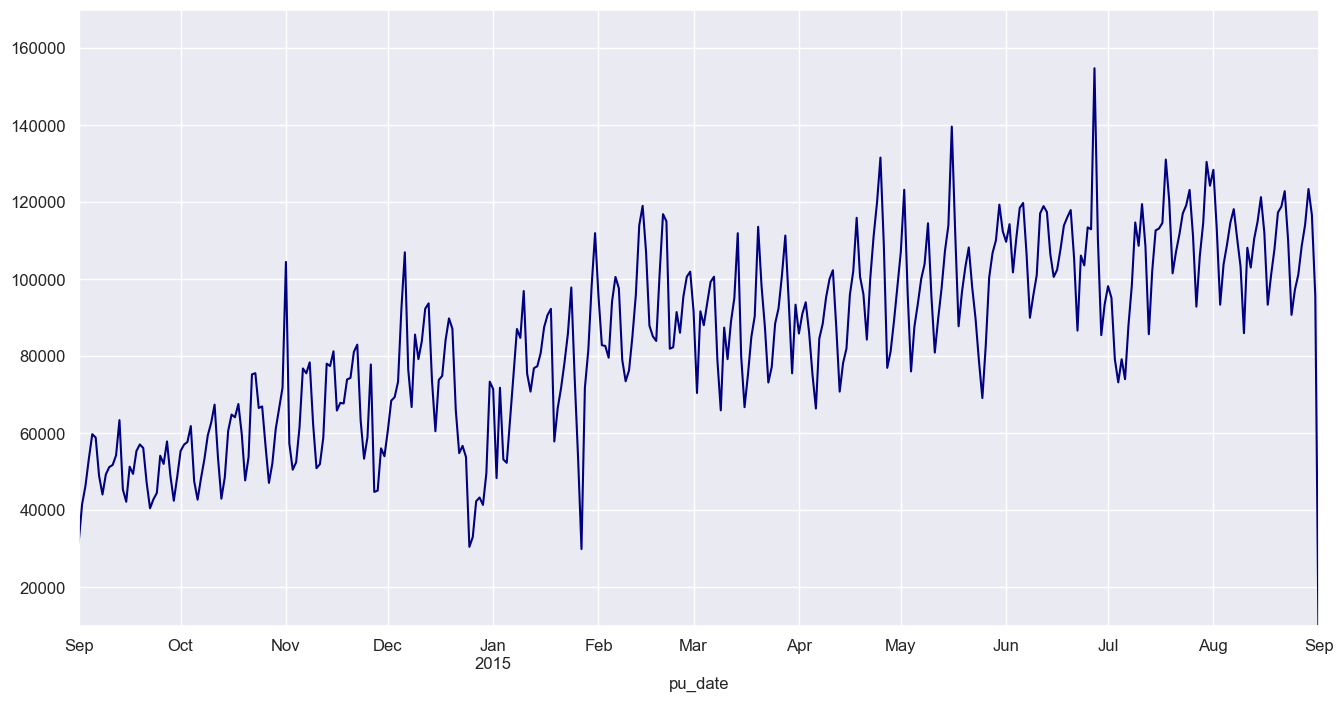

In [56]:
fig = plt.figure()
ax = byDate.plot(figsize = (16,8),fontsize = 12 , ylim = (10000,170000),color = 'navy')

# Efftect of time on demand for uber rides:Distribution per hour,weekday and month